# Нашей задачей будет предсказать удовлетворённость пассажиров
Мы будем работать c данными, которые содержат результаты опроса клиентов авиакомпании по поводу их удовлетворённости полётом.



In [49]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

from sklearn import set_config
set_config(transform_output='pandas')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

sns.set_theme('notebook') 
sns.set_palette('Set2')

plt.rcParams['figure.figsize'] = (12, 8) 

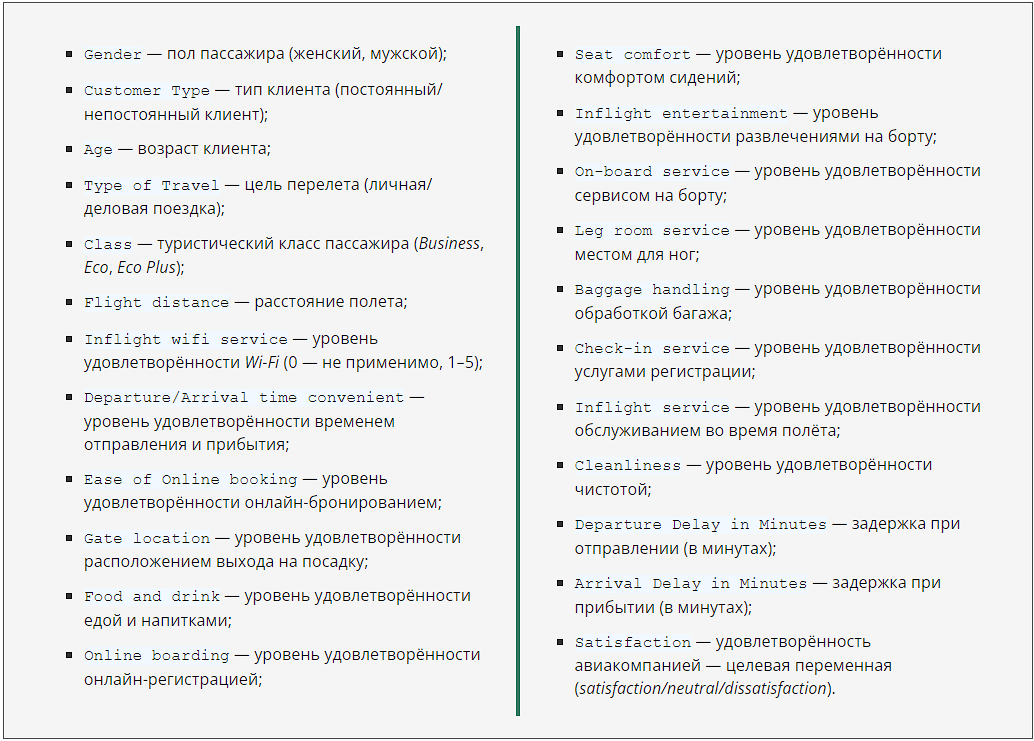

In [50]:
# !pip install xgboost
# !pip install catboost

In [51]:
df = pd.read_csv('data/AirPass.zip', index_col=0)
TARGET = 'satisfaction'
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [53]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [54]:
df.fillna({'Arrival Delay in Minutes': df['Arrival Delay in Minutes'].median()}, inplace=True)
df['Arrival Delay in Minutes'].mean().round(2)

15.13

In [55]:
df.describe(include='object').T

,count,unique,top,freq
Gender,103904,2,Female,52727
Customer Type,103904,2,Loyal Customer,84923
Type of Travel,103904,2,Business travel,71655
Class,103904,3,Business,49665
satisfaction,103904,2,neutral or dissatisfied,58879


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


In [57]:
df.shape

(103904, 24)

# Доля уникальных объектов

In [58]:
(df.nunique() / df.shape[0] * 100).to_frame().round(2).rename(columns={0: 'share, %'})

,"share, %"
id,100.00
Gender,0.00
Customer Type,0.00
Age,0.07
Type of Travel,0.00
Class,0.00
Flight Distance,3.66
Inflight wifi service,0.01
Departure/Arrival time convenient,0.01
Ease of Online booking,0.01


id это просто номер во внутренней базе, абсолютно уникальный признак. Удаляю, он бесполезен.

# Проверка наличия дубликатов

In [59]:
df.duplicated().sum()

0

### Проверка сбалансированности классов целевого признака

In [60]:
(df[TARGET].value_counts(True) * 100).round(2)

satisfaction
neutral or dissatisfied    56.67
satisfied                  43.33
Name: proportion, dtype: float64

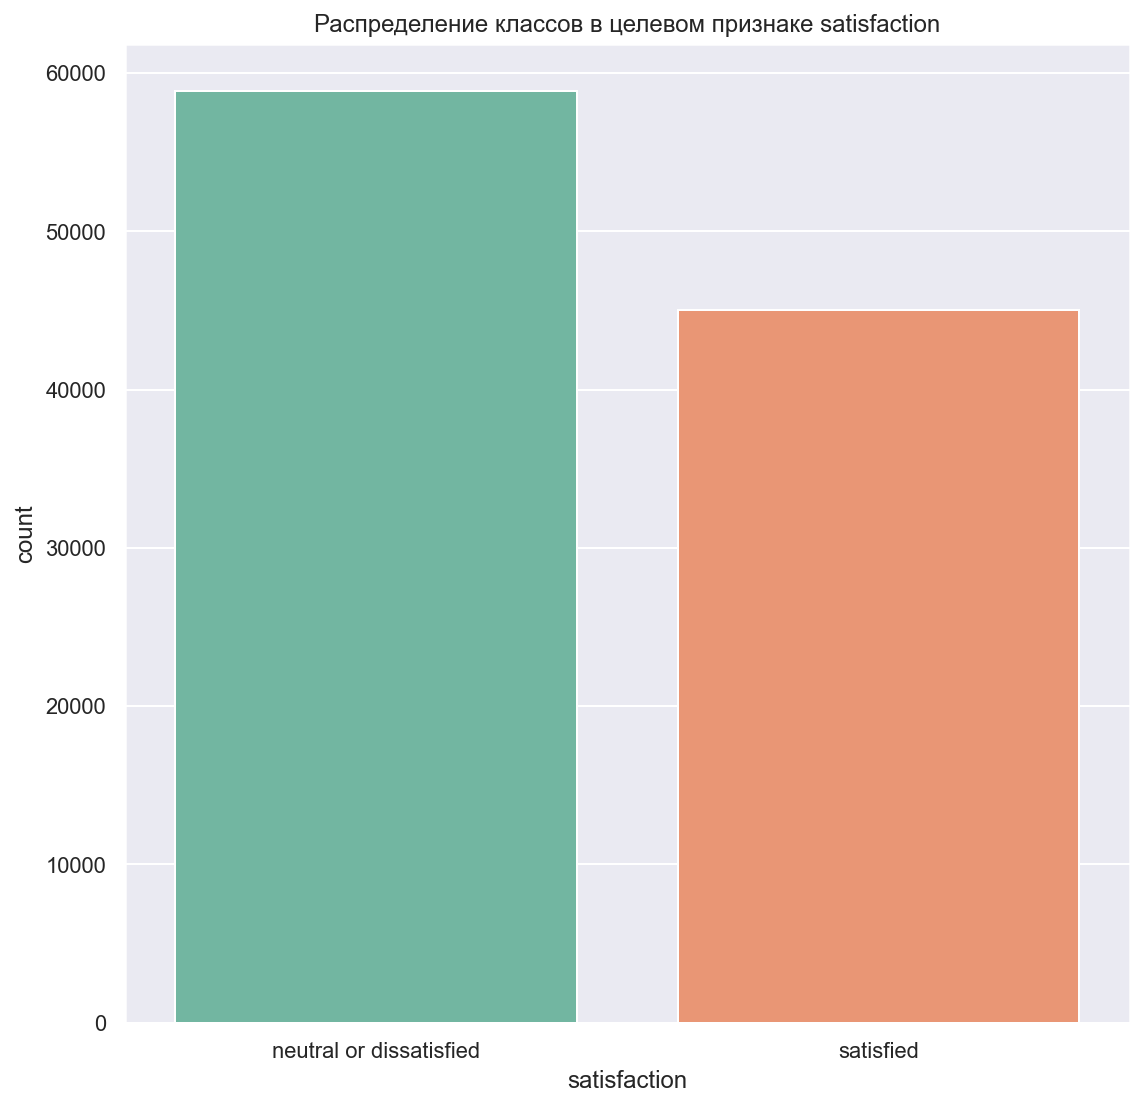

In [61]:
fig = plt.figure(figsize=(9, 9))
sns.countplot(data=df, x=TARGET)
plt.title(f'Распределение классов в целевом признаке {TARGET}')
plt.show()

Классы немного не сбалансированны, нужно использовать стратифицированное разбиение, взвешенвание классов, и метрики отличные от accuracy

In [62]:
num_columns = df.select_dtypes(include=np.number).columns.to_list()
num_columns

['id',
 'Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

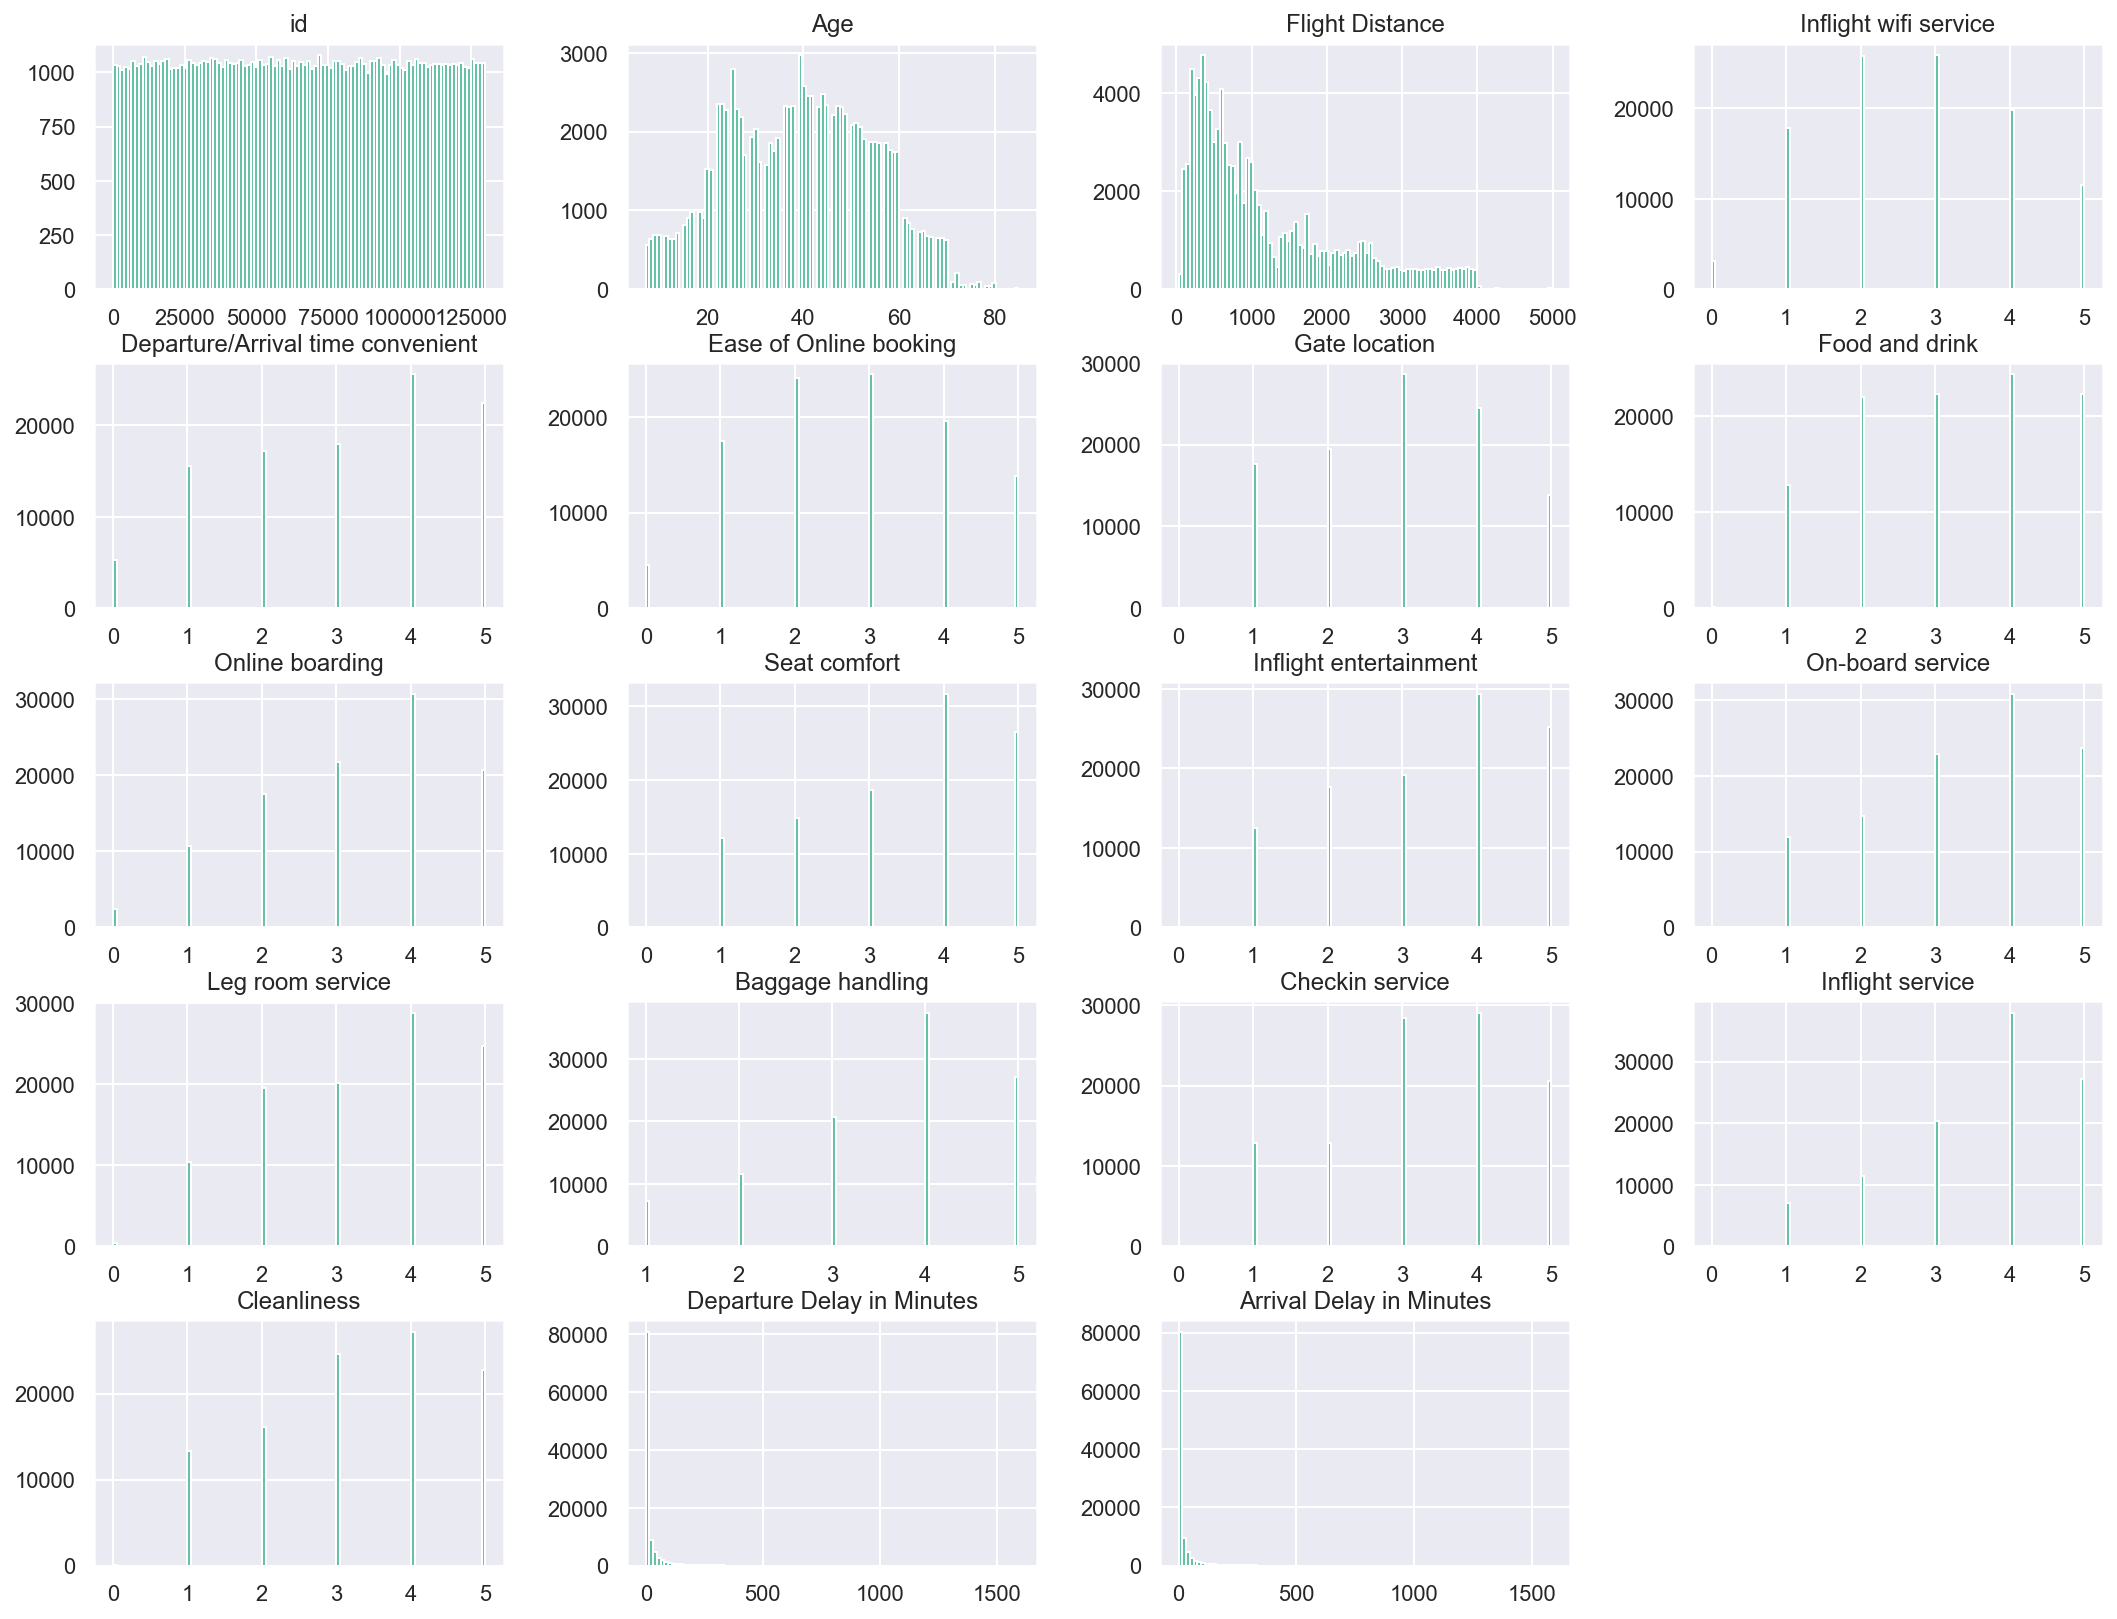

In [63]:
# Распределение по всем числовым признакам
df[num_columns].hist(figsize=(18, 14), bins=100);

Действительно числовые признаки это Age, Flight Distance.
Остальные числовые признаки являются категориальными порядковыми.

# EDA

fig = plt.figure(figsize=(9, 9))
sns.countplot(data=df, x=TARGET)
plt.title(f'Распределение классов в целевом признаке {TARGET}')
plt.show()

In [64]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


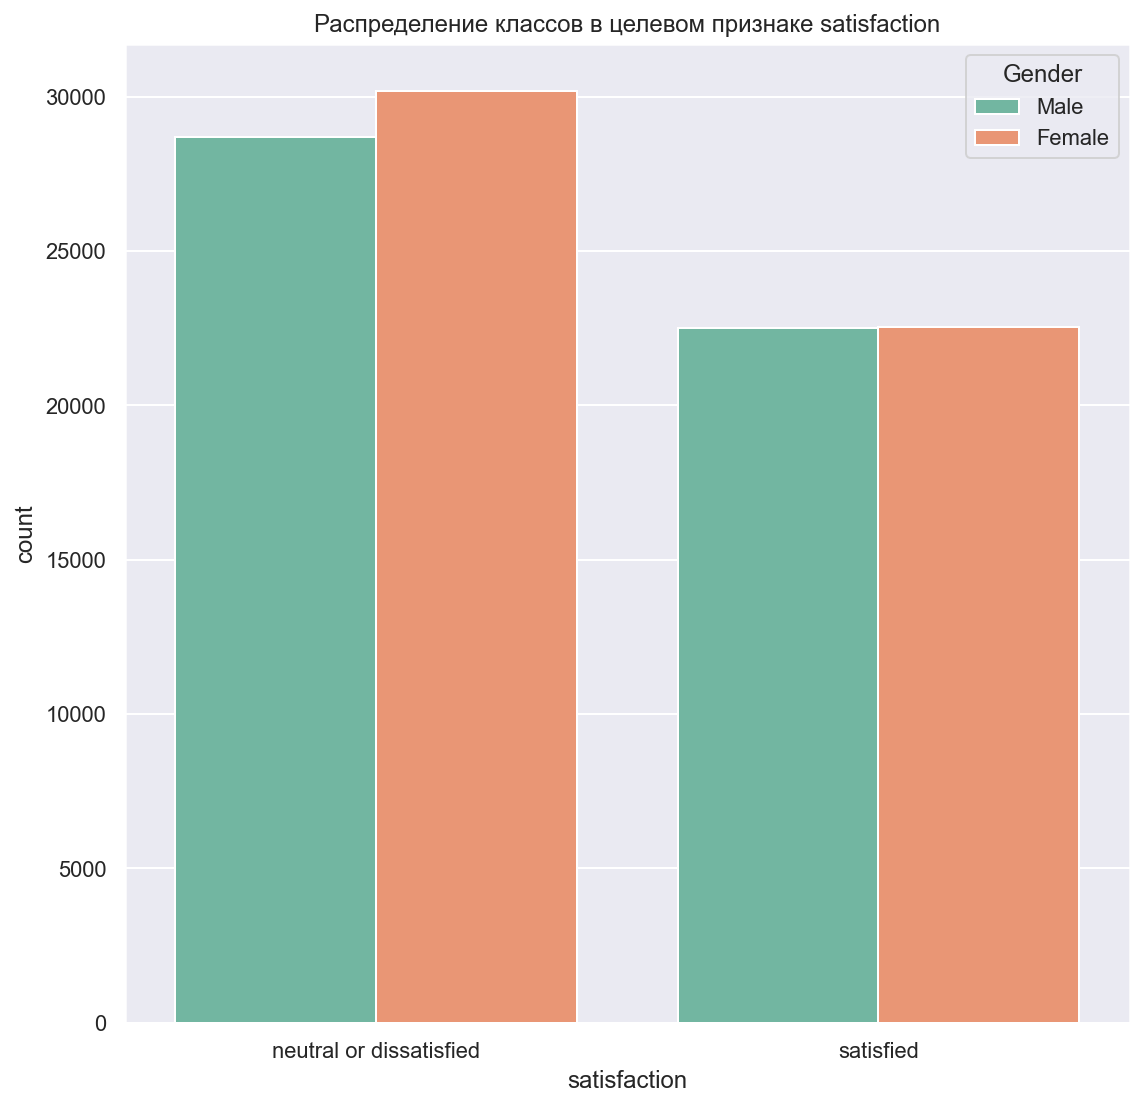

In [109]:
fig = plt.figure(figsize=(9, 9))
sns.countplot(data=df, x=TARGET, hue='Gender')
plt.title(f'Распределение классов в целевом признаке {TARGET}')
plt.show()

In [112]:
df.pivot_table(index='satisfaction', columns='Gender', aggfunc='size')

Gender,Female,Male
satisfaction,,
neutral or dissatisfied,30193,28686
satisfied,22534,22491


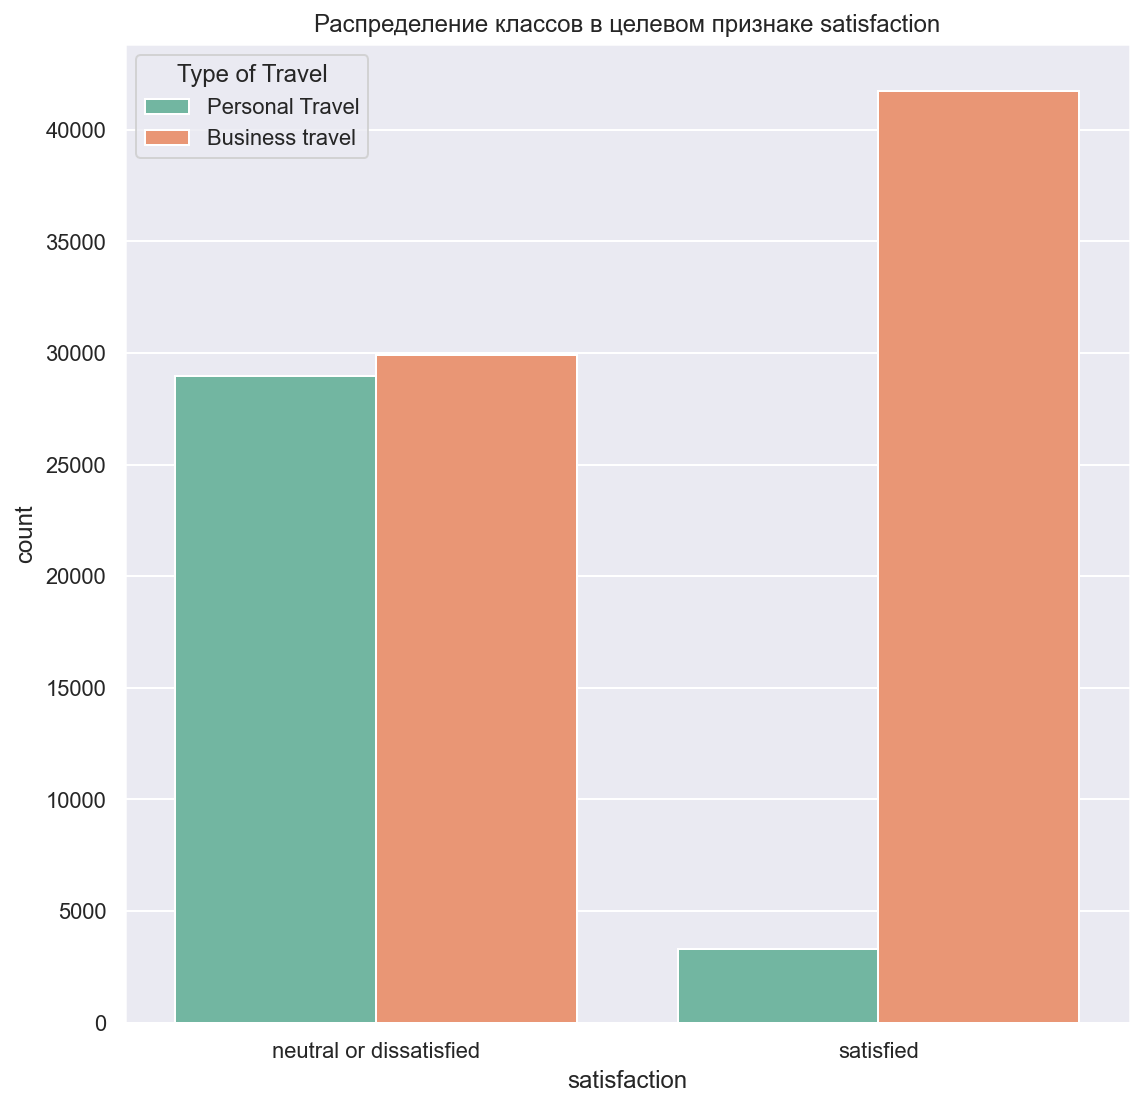

In [46]:
fig = plt.figure(figsize=(9, 9))
sns.countplot(data=df, x=TARGET, hue='Type of Travel')
plt.title(f'Распределение классов в целевом признаке {TARGET}')
plt.show()

In [108]:
df.pivot_table(index='satisfaction', columns='Type of Travel', aggfunc='size')

Type of Travel,Business travel,Personal Travel
satisfaction,,
neutral or dissatisfied,29909,28970
satisfied,41746,3279


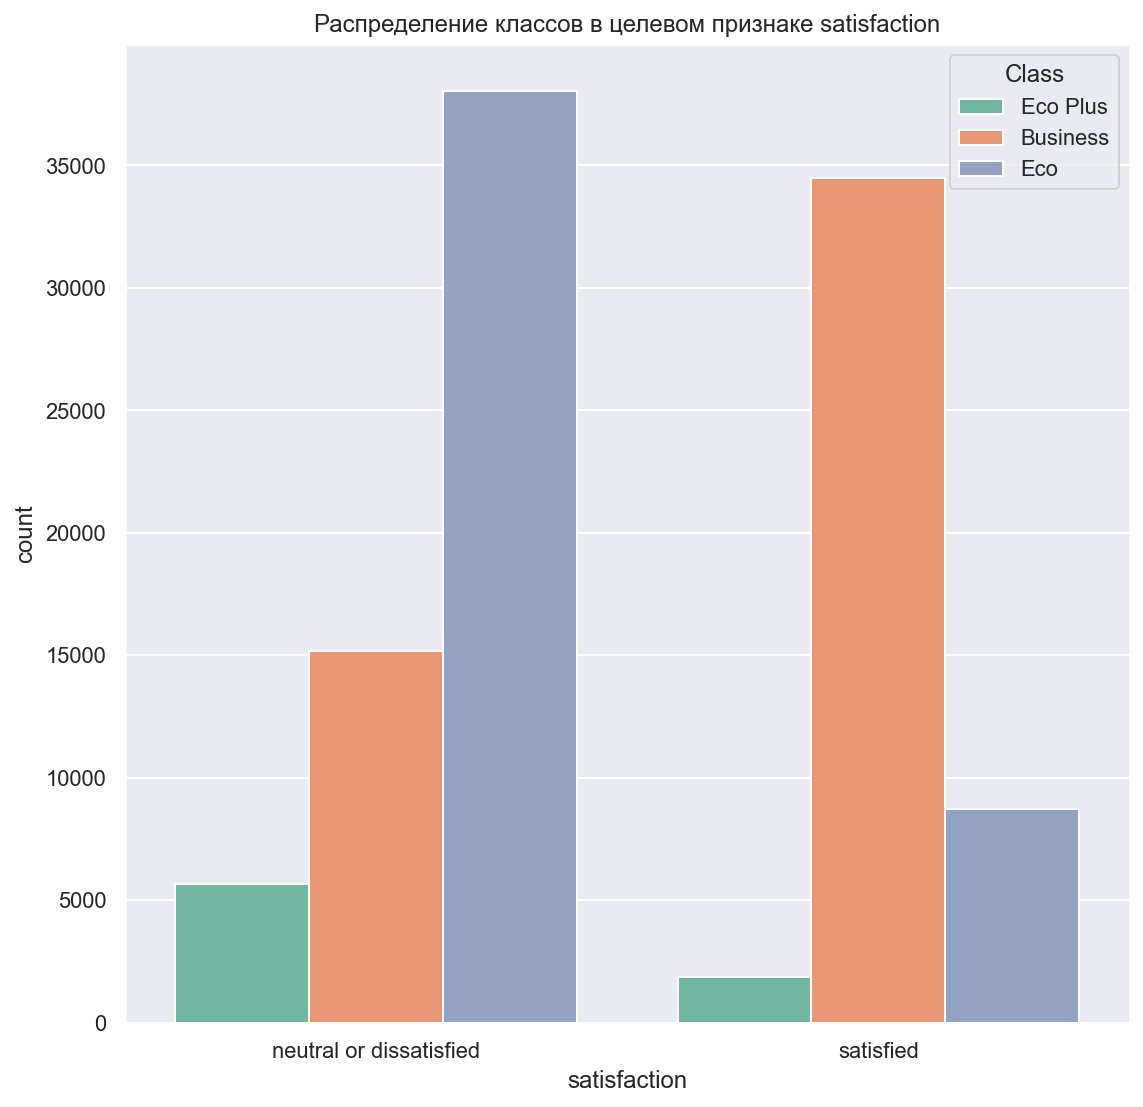

In [47]:
fig = plt.figure(figsize=(9, 9))
sns.countplot(data=df, x=TARGET, hue='Class')
plt.title(f'Распределение классов в целевом признаке {TARGET}')
plt.show()

In [107]:
df.pivot_table(index='satisfaction', columns='Class', aggfunc='size')

Class,Business,Eco,Eco Plus
satisfaction,,,
neutral or dissatisfied,15185,38044,5650
satisfied,34480,8701,1844


In [ ]:
Перекодируем часть бинарных признаков, чтобы использовать их при обучении:

df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})